In [1]:
import Pkg

Pkg.activate(@__DIR__) # `@__DIR__` always gives the directory of where it was run

Pkg.add("CairoMakie")

Pkg.status()

  Activating project at `c:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter5`
    Updating registry at `C:\Users\nguye\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter5\Project.toml`
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter5\Manifest.toml`
   Resolving package versions...
   Installed MKL_jll ─────────────── v2024.2.0+0
   Installed MakieCore ───────────── v0.8.4
   Installed IntelOpenMP_jll ─────── v2024.2.0+0
   Installed CairoMakie ──────────── v0.12.5
   Installed DelaunayTriangulation ─ v1.0.5
   Installed Makie ───────────────── v0.21.5
    Updating `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter5\Project.toml`
  [13f3f980] + CairoMakie v0.12.5
    Updating `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter5\Manifest.toml`
  [621f4979] + AbstractFFTs v1.5.0
  [1520ce14] + AbstractTrees v0.4.5
  [79e6a3ab] + Adapt v4.0.4
  [66dad0bd] + A

Status `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter5\Project.toml`
  [13f3f980] CairoMakie v0.12.5
  [9a3f8284] Random


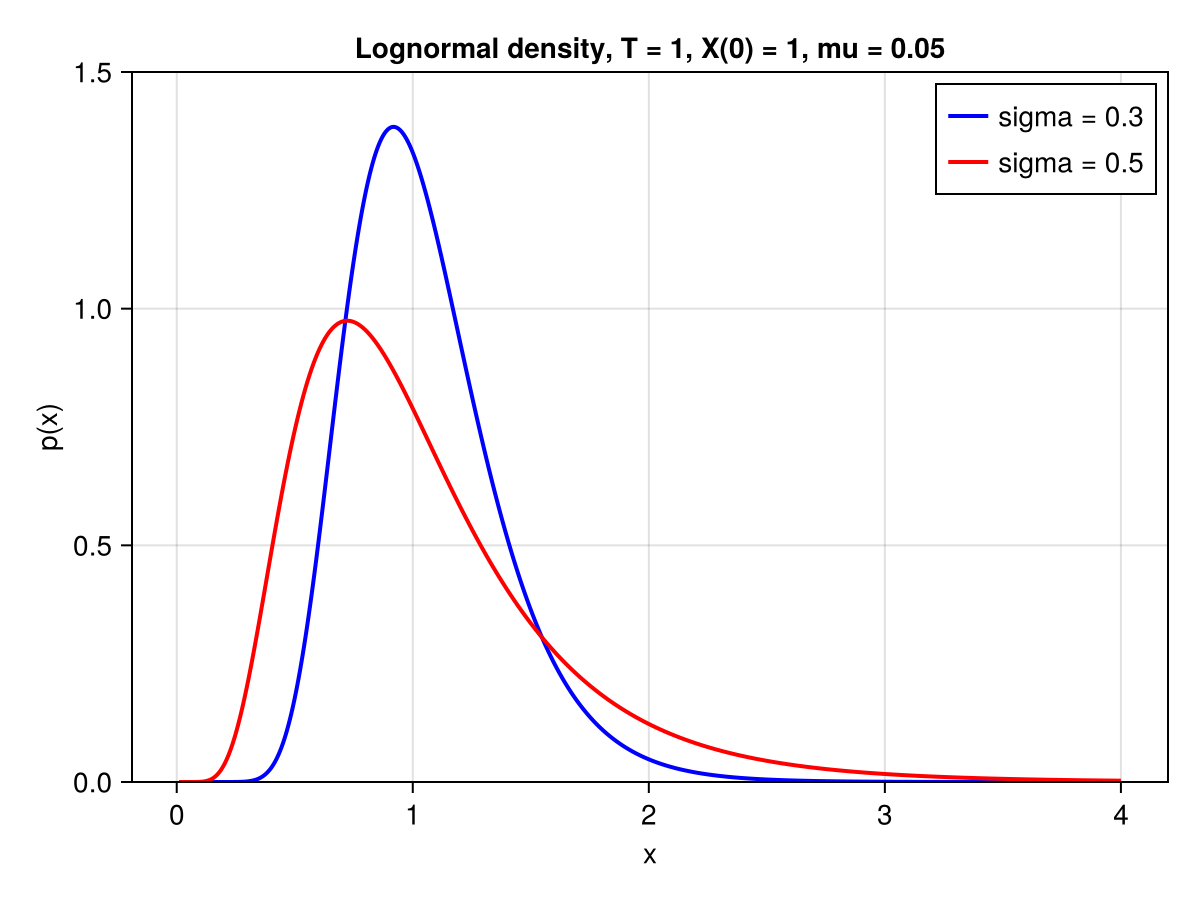

In [31]:
# # Translated from Matlab to Julia

# using CairoMakie

# x = LinRange(0.01, 4, 1000)

# T = 1
# Xzero = 1
# mu = 0.05

# sigma = 0.3

# upper = ((log.(x / Xzero) .- (mu - 0.5 * sigma^2) * T).^2) / (2 * sigma^2 * T)
# lower = x .* (sigma * sqrt(2 * pi * T))
# y1 = exp.(-upper) ./ lower

# fig = Figure()

# ax = Axis(
#     fig[1, 1],
# )

# lines!(ax, x, y1, color = :blue, linewidth = 2, label = "sigma = 0.3")
# ylims!(ax, 0, 1.5)

# sigma = 0.5
# upper = ((log.(x / Xzero) .- (mu - 0.5 * sigma^2) * T).^2) / (2 * sigma^2 * T)
# lower = x .* (sigma * sqrt(2 * pi * T))
# y2 = exp.(-upper) ./ lower

# lines!(ax, x, y2, color = :red, linewidth = 2, label = "sigma = 0.5")

# axislegend(ax)
# ax.title = "Lognormal density, T = 1, X(0) = 1, mu = 0.05"
# ax.xlabel = "x"
# ax.ylabel = "p(x)"

# fig

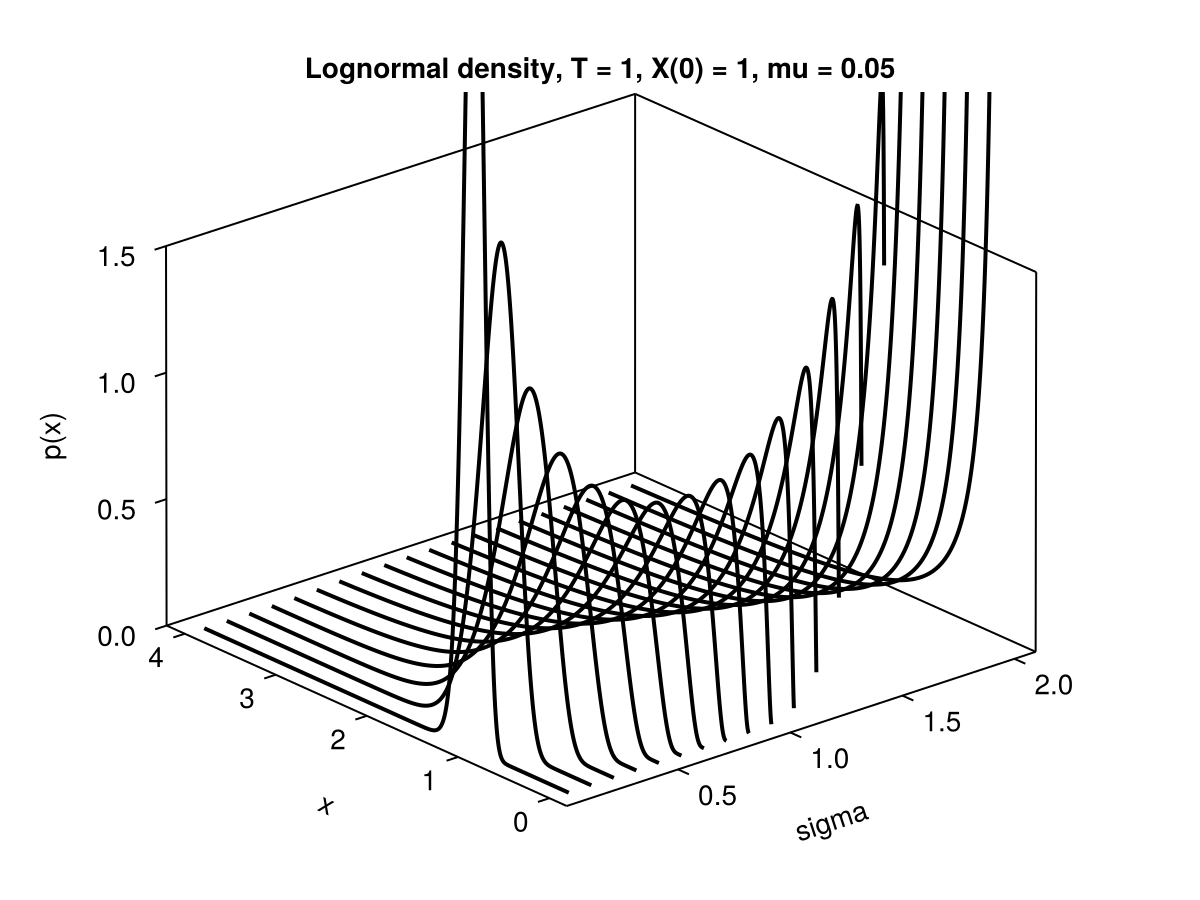

In [85]:
using CairoMakie

x = LinRange(0.01, 4, 1000)

T = 1
Xzero = 1
mu = 0.05

sigma = 0.1:0.1:2
sigma = transpose(sigma)

upper = ((log.(x / Xzero) .- (mu .- 0.5 * sigma.^2) * T).^2) ./ (2 * sigma.^2 * T)
lower = x .* (sigma * sqrt(2 * pi * T))
y = exp.(-upper) ./ lower

fig = Figure()

ax = Axis3(
    fig[1, 1],
    xgridvisible=false, ygridvisible=false, zgridvisible=false,
)

for (i, _) in enumerate(sigma)
    lines!(ax, fill(sigma[i], length(x)), x, y[:, i], linewidth = 2, color = :black)
end

zlims!(ax, 0, 1.5)

ax.title = "Lognormal density, T = 1, X(0) = 1, mu = 0.05"
ax.xlabel = "sigma"
ax.ylabel = "x"
ax.zlabel = "p(x)"

fig